In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# grab wine quality data
# P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. "Wine Quality," UCI Machine Learning Repository, 2009. [Online]. Available: https://doi.org/10.24432/C56S3T.
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')
print(f"Number of red wines: {len(red_wine)}")
print(f"Number of white wines: {len(white_wine)}")


Number of red wines: 1599
Number of white wines: 4898


In [3]:
# use white wine data only
wine = white_wine[:]
X = wine.drop(['quality'], axis=1)
y = wine['quality']
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# check out basic attributes
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# look for missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

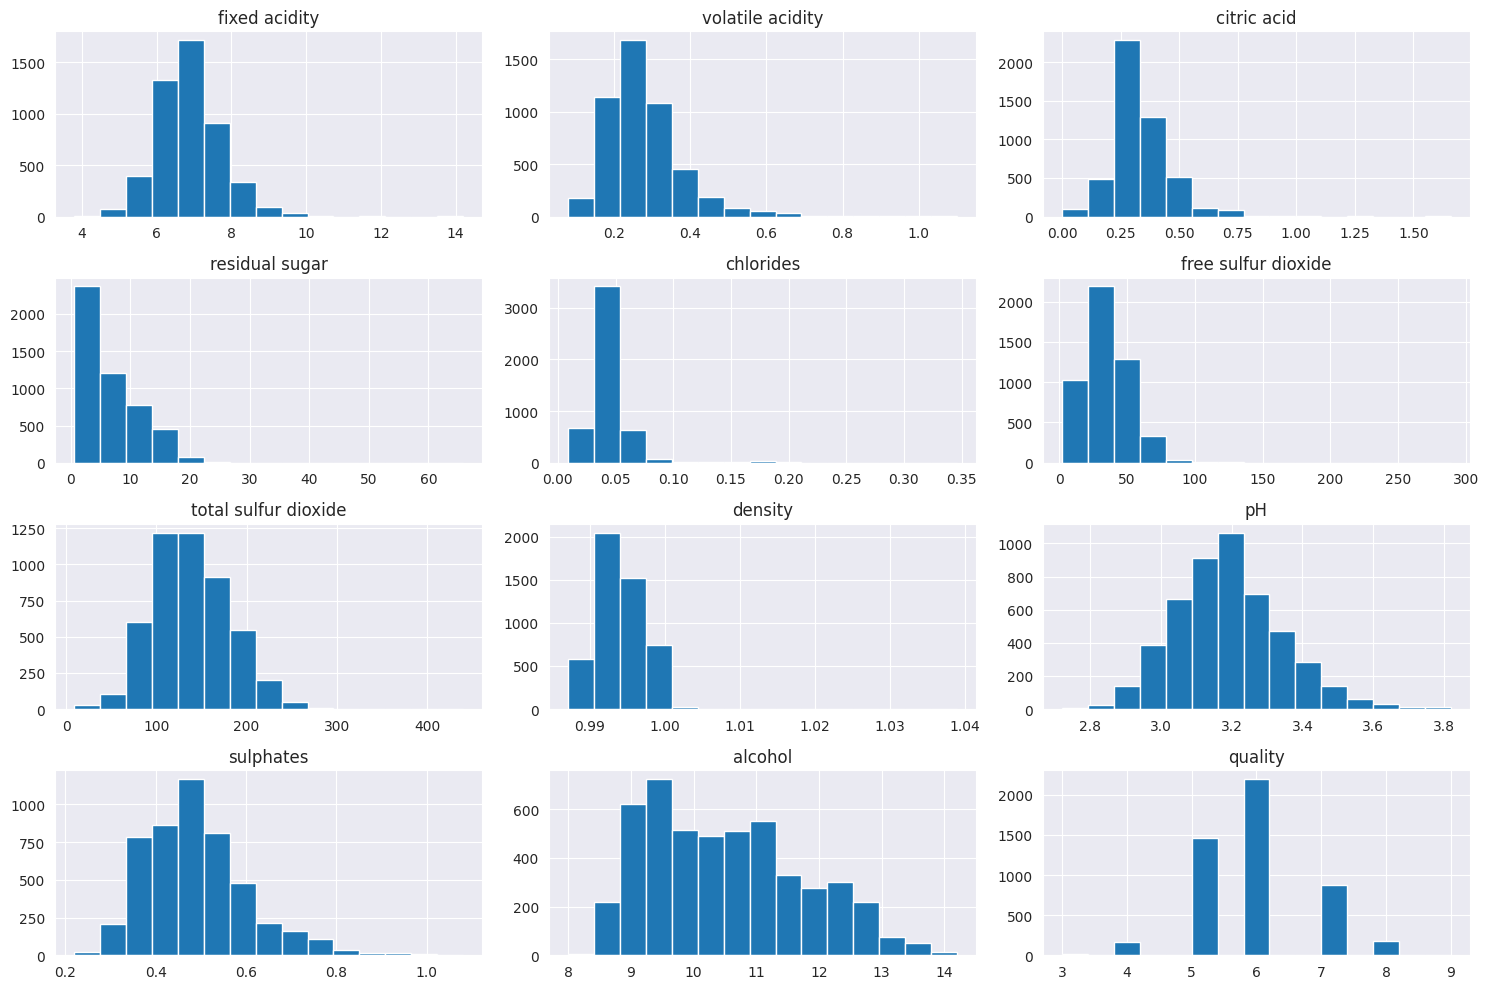

In [6]:
# look at all rating/feature distributions
wine.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

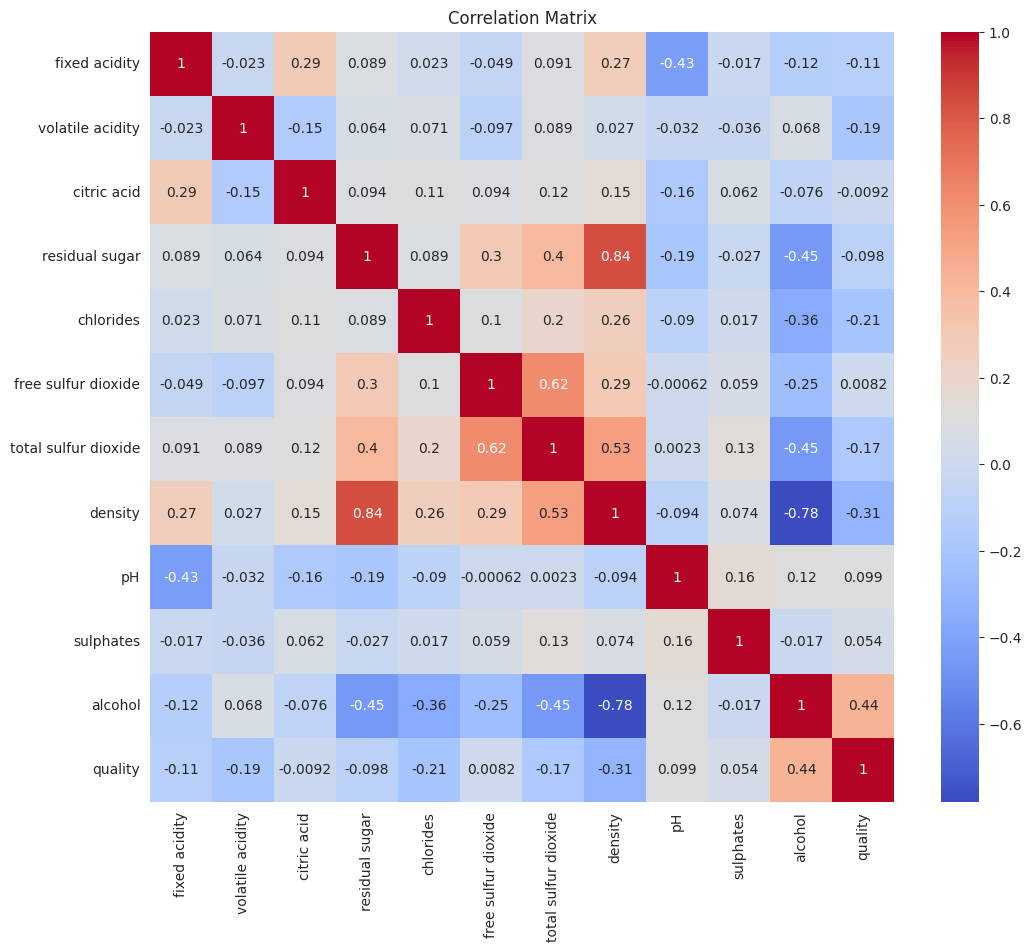

In [7]:
# look at correlation matrix
corr = wine.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

In [9]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression

# fit to linear regression & predict
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [11]:
# check performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rms = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rms:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 0.5583
Root Mean Squared Error: 0.7472
R-squared Score: 0.2813


In [12]:
# check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(
    X_train_scaled_df.values, i) for i in range(len(X_train_scaled_df.columns))]

vif_data

,Feature,VIF
0,fixed acidity,2.637179
1,volatile acidity,1.146248
2,citric acid,1.181237
3,residual sugar,12.288512
4,chlorides,1.240353
5,free sulfur dioxide,1.782032
6,total sulfur dioxide,2.223873
7,density,27.274860
8,pH,2.191005
9,sulphates,1.134698


In [13]:
# drop feature with highest VIF

high_vif_features = ['density']

X_reduced = X.drop(high_vif_features, axis=1)

X_train_reduced = X_train.drop(high_vif_features, axis=1)
X_test_reduced = X_test.drop(high_vif_features, axis=1)

X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

In [14]:
# re-fit model
lr_reduced = LinearRegression()
lr_reduced.fit(X_train_reduced_scaled, y_train)

y_pred_reduced = lr_reduced.predict(X_test_reduced_scaled)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
rmse_reduced = np.sqrt(mse_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Mean Squared Error: {mse_reduced:.4f}")
print(f"Root Mean Squared Error: {rmse_reduced:.4f}")
print(f"R-squared Score: {r2_reduced:.4f}")

Mean Squared Error: 0.5624
Root Mean Squared Error: 0.7499
R-squared Score: 0.2761


In [15]:
# look at VIF again

X_train_scaled_df = pd.DataFrame(X_train_reduced_scaled, columns=X_reduced.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(
    X_train_scaled_df.values, i) for i in range(len(X_train_scaled_df.columns))]

vif_data

,Feature,VIF
0,fixed acidity,1.356758
1,volatile acidity,1.131840
2,citric acid,1.175993
3,residual sugar,1.429813
4,chlorides,1.204951
5,free sulfur dioxide,1.736847
6,total sulfur dioxide,2.140039
7,pH,1.328339
8,sulphates,1.055284
9,alcohol,1.642925


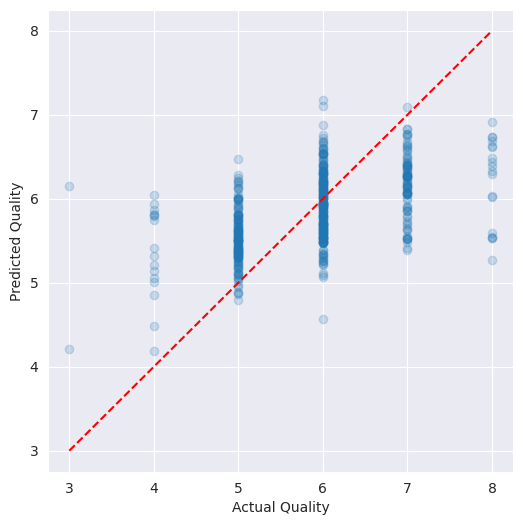

In [16]:
# graph linear model
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_reduced, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

In [17]:
# try a lasso model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_values = {'alpha': np.logspace(-4, 4, 50)}

lasso = Lasso()

lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f"Best alpha: {best_alpha_lasso}")

Best alpha: 0.0062505519252739694


In [18]:
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_best.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error: {mse_lasso:.4f}")
print(f"Root Mean Squared Error: {rmse_lasso:.4f}")
print(f"R-squared Score: {r2_lasso:.4f}")

Mean Squared Error: 0.5600
Root Mean Squared Error: 0.7483
R-squared Score: 0.2792


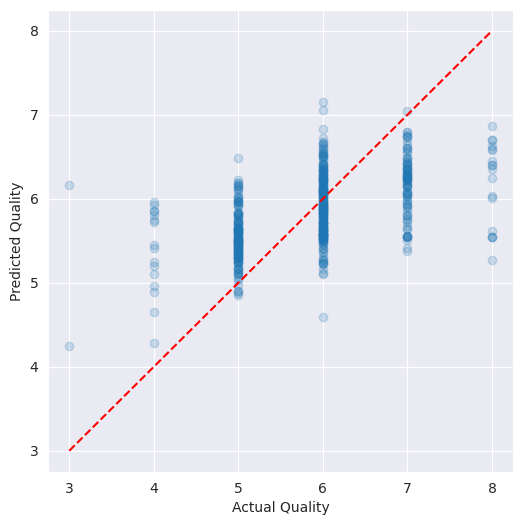

In [19]:
# graph lasso model
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

In [20]:
# compare coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': lr.coef_.transpose().ravel(),
    'Lasso Regression': lasso_best.coef_.transpose().ravel(),
})

coefficients.set_index('Feature', inplace=True)
coefficients

,Linear Regression,Lasso Regression
Feature,,
fixed acidity,0.059134,0.000000
volatile acidity,-0.185696,-0.188102
citric acid,0.006745,0.000000
residual sugar,0.413531,0.253410
chlorides,-0.000693,-0.006900
free sulfur dioxide,0.060097,0.053917
total sulfur dioxide,-0.012471,-0.005432
density,-0.451975,-0.220739
pH,0.108318,0.055767


In [21]:
# check cross-validation scores
from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression Mean MSE: {-np.mean(cv_scores_lr):.4f}")

cv_scores_lasso = cross_val_score(lasso_best, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression Mean MSE: {-np.mean(cv_scores_lasso):.4f}")

Linear Regression Mean MSE: 0.5722
Lasso Regression Mean MSE: 0.5709
